In [1]:
!pip install gensim==4.3.1

  Using cached gensim-4.3.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathy 0.6.2 requires smart-open<6.0.0,>=5.2.1, but you have smart-open 6.3.0 which is incompatible.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 68.1 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 123.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 150.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 120.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 118.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 16.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googl

In [92]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn import svm
import random
from gensim.models import Word2Vec
import gensim.downloader as api
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# iPhone 11

In [93]:
df = pd.read_csv("apple_iphone_11_reviews.csv")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          5010 non-null   int64 
 1   review_text    5007 non-null   object
 2   review_rating  5010 non-null   object
 3   review_title   5008 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


In [95]:
df_1 = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'apple_iphone_11_reviews.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'apple_iphone_11_reviews.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_1

,index,review_text,review_rating,review_title
0,0,NOTE:,3.0 out of 5 stars,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Don't buy iPhone xr from Amazon.
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Happy with the purchase
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Amazon is not an apple authorised reseller. Pl...
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,Excellent Battery life and buttery smooth UI
...,...,...,...,...
5005,5005,Dhamaka,4.0 out of 5 stars,Dhamaka phone
5006,5006,Goodbye,4.0 out of 5 stars,Good
5007,5007,Nothing,5.0 out of 5 stars,Fantabulous phone. Easy to use.
5008,5008,Superbb,5.0 out of 5 stars,Fantastic


In [96]:
df.dropna(inplace=True)

In [97]:
stop_words = set(stopwords.words('english'))
selected_words = ['iphone', 'apple', 'brought', 'amazon', 'one', 'good', 'product', 'life', 'review', 'purchased', 'price', 'purchase', 'phone', 'month', 'buy', 'got']
stop_words.update(selected_words)

def process_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text


In [98]:
df['clean_text'] = df['review_text'].apply(process_text)

## Sentiment Analysis

In [99]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [100]:
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [101]:
df

,index,review_text,review_rating,review_title,clean_text,sentiment,sentiment_category
0,0,NOTE:,3.0 out of 5 stars,"Which iPhone you should Purchase ? iPhone 8, X...",note,0.0000,negative
1,1,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Don't buy iPhone xr from Amazon.,bad experience xr back camera found defective ...,-0.8720,negative
2,2,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Happy with the purchase,amazing amazing camera coming plus great service,0.9136,positive
3,3,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Amazon is not an apple authorised reseller. Pl...,xr today looks amazing unfortunately face id w...,0.6908,positive
4,4,I've been an android user all my life until I ...,5.0 out of 5 stars,Excellent Battery life and buttery smooth UI,ive android user decided try xr ios loving cam...,0.9423,positive
...,...,...,...,...,...,...,...
5005,5005,Dhamaka,4.0 out of 5 stars,Dhamaka phone,dhamaka,0.0000,negative
5006,5006,Goodbye,4.0 out of 5 stars,Good,goodbye,0.0000,negative
5007,5007,Nothing,5.0 out of 5 stars,Fantabulous phone. Easy to use.,nothing,0.0000,negative
5008,5008,Superbb,5.0 out of 5 stars,Fantastic,superbb,0.0000,negative


In [102]:
print(df['review_rating'].unique())

['3.0 out of 5 stars' '1.0 out of 5 stars' '5.0 out of 5 stars'
 '4.0 out of 5 stars' '2.0 out of 5 stars']


In [103]:
df['review_rating'] = df['review_rating'].str.replace(' out of 5 stars', '')
df['review_rating'] = df['review_rating'].astype(float)

In [104]:
positive_threshold = 4.0
negative_threshold = 2.0
positive_text = df[df['review_rating'] >= positive_threshold]
negative_text = df[df['review_rating'] <= negative_threshold]

In [105]:
positive_text = df[df['sentiment_category'] == 'positive']
negative_text = df[df['sentiment_category'] == 'negative']

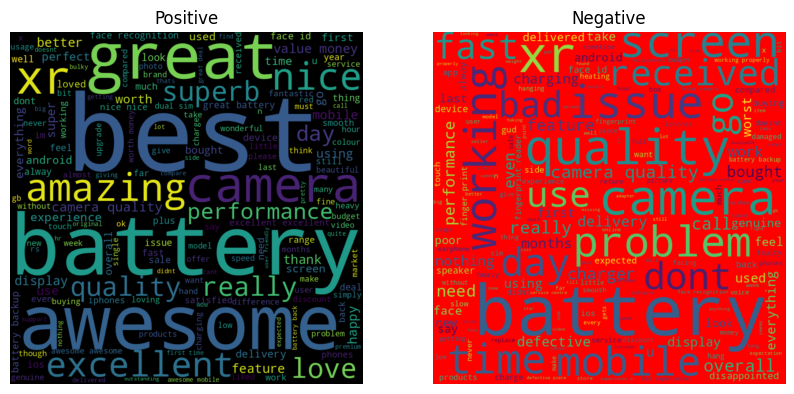

In [106]:
stop_words = set(STOPWORDS)

positive_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='black', min_font_size=10).generate(' '.join(positive_text['clean_text']))
negative_cloud = WordCloud(stopwords=stop_words, width=800, height=800, background_color='red', min_font_size=10).generate(' '.join(negative_text['clean_text']))
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(positive_cloud, interpolation='bilinear')
axes[0].set_title('Positive')
axes[0].axis('off')
axes[1].imshow(negative_cloud, interpolation='bilinear')
axes[1].set_title('Negative')
axes[1].axis('off')
plt.show()

### lowest sentiment text

In [110]:
lowest_sentiment_row = df.sort_values(by='sentiment').iloc[0]
print('Review text:', lowest_sentiment_row['review_text'])
print('Sentiment score:', lowest_sentiment_row['sentiment'])

Review text: Faulty product delivered and Amazon not giving replacement. Cheating with customer and just making money by scam and defective product delivery. Phone is not usable as display stop working randomly and screen freeze suddenly. I have provide problem video also to Amazon within 10 days of replacement but Amazon just making money and cheating with customer.
Sentiment score: -0.9545


### highest sentiment text

In [111]:
highest_sentiment_row = df.sort_values('sentiment', ascending=False).iloc[0]
print('Review text:', highest_sentiment_row['review_text'])
print('Sentiment score:', highest_sentiment_row['sentiment'])


Review text: Wow Wow Apple iPhone XR Looks Amazing In Stunning White Colour Thanks To Amazon For Giving For Best Price In The Market Love You Amazon For Quick Delivery But Packaging  Is Not That Great It Should Be In More Secure Packaging  When Comes To Phone After 8 Years I am Using Again iPhone Before I Used iPhone 4s Now Again Coming Back From Android Phones To IOS Makes mee feel Happy And This Phone Is a beast go for it .
Sentiment score: 0.9898


In [114]:
def clean_text(review_text):
    if isinstance(review_text, str):
        text = review_text.lower() # Convert to lowercase
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word for word in tokens if word.isalpha()] # Remove punctuation
        tokens = [word for word in tokens if word not in stop_words] # Remove stop words
        return tokens
    else:
        return ""

In [115]:
data =  positive_text + negative_text
labels = ['Positive'] * len(positive_text) + ['Negative']

In [116]:
data = [clean_text(text) for text in data['review_text']]

vectorizer = TfidfVectorizer()
text_data = vectorizer.fit_transform(df['clean_text'].values.astype('U')) # Convert to Unicode string

labels = df['review_text'].values

In [117]:

train_data, test_data, train_labels, test_labels = train_test_split(text_data, labels, test_size=0.4, random_state=42)

imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)


## Logistic Regression

In [118]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.08686969545681478


## Naive Bayes 

In [119]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.06640039940089865


## Random Forest 

In [120]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.06640039940089865


# oversampled

In [121]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
ros = RandomOverSampler(random_state=42)
train_data, train_labels = ros.fit_resample(train_data, train_labels)

# LogisticRegression

In [122]:
model = LogisticRegression()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.02196704942586121


# NaiveBayes

In [123]:
model = MultinomialNB()
model.fit(train_data, train_labels)

test_predictions = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.040938592111832255


# RandomForest

In [124]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_data, train_labels)

y_pred = model.predict(test_data)

test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.040938592111832255


In [125]:
selected_word = input('Enter a word to search for: ')
selected_reviews = df[df['clean_text'].str.contains(selected_word)]

sid = SentimentIntensityAnalyzer()
selected_reviews['sentiment_score'] = selected_reviews['review_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
positive_reviews = selected_reviews[selected_reviews['sentiment_score'] > 0]
negative_reviews = selected_reviews[selected_reviews['sentiment_score'] <= 0]

# Print out the selected reviews by sentiment category
print(f"Positive reviews containing the word '{selected_word}':")
for review_text in positive_reviews['review_text']:
    print(review_text)

print(f"\nNegative reviews containing the word '{selected_word}':")
for review_text in negative_reviews['review_text']:
    print(review_text)

Positive reviews containing the word 'battery':
I've been an android user all my life until I decided to try iPhone XR for iOS. Loving the camera and battery life is an absolute joy to have. It's been more than one month since I got this phone and I'm loving it. Face ID works flawlessly even in the dark and the dual sim function is working like a charm, I'm using Vodafone as my primary sim and Jio as e-sim and have faced no problem whatsoever.
It has been a month since I started using my iPhone XR and the experience has been awesome. Excellent battery life, smooth operating system, and most of all, dual Sim functionality are the best features of this iPhone. Spent so many days to decide on the colour, but opted for white, and I’m very happy about it. Coral is also a very good colour option which I have bought for my wife. Only issue bothering me is the time taken to charge the phone. You need to opt for overnight charging. Other than that, extremely happy with the purchase.
I've been a

In [126]:
positive_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] > 0)]
num_positive_selected = len(positive_selected_reviews[positive_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
positive_percentage = num_positive_selected / num_total_selected * 100                           

# Print out the percentage of positive reviews containing the selected word
print(f"Percentage of positive reviews containing the word '{selected_word}': {positive_percentage:.2f}%")

Percentage of positive reviews containing the word 'battery': 83.12%


In [127]:
negative_selected_reviews = selected_reviews[(selected_reviews['sentiment_score'] <= 0)]
num_negative_selected = len(negative_selected_reviews[negative_selected_reviews['clean_text'].str.contains(selected_word)])
num_total_selected = len(selected_reviews[selected_reviews['clean_text'].str.contains(selected_word)])
negative_percentage = num_negative_selected / num_total_selected * 100                           

# Print out the percentage of negative reviews containing the selected word
print(f"Percentage of negative reviews containing the word '{selected_word}': {negative_percentage:.2f}%")

Percentage of negative reviews containing the word 'battery': 16.88%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=320e99cb-8487-44b0-a3ee-3aa3add03759' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>